In [61]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import spatial

In [66]:
num_exprs = 100
rs = np.linspace(-1, 1, num_exprs)

N = 500

corrs = np.zeros((len(rs), 2))

for i, corr_rs in enumerate(rs):
    
    x = np.random.randn(N)
    y = x * corr_rs + np.random.randn(N) * np.sqrt(1 - corr_rs ** 2)
    
    #x = x + 10
    #y = y + 10
    
    corr_p = stats.pearsonr(x, y)[0]
    
    #cs_num = np.sum(x * y)
    #cs_den = np.sqrt(np.sum(x ** 2) * np.sum(y ** 2))
    
    #corrs[i] = [corr_p, cs_num / cs_den]
    
    corrs[i] = [corr_p, 1 - spatial.distance.cosine(x, y)]

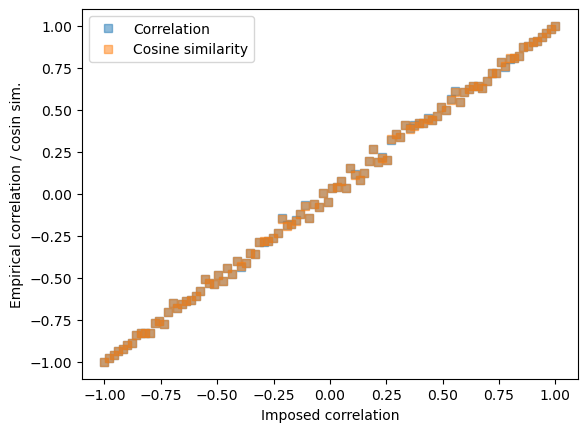

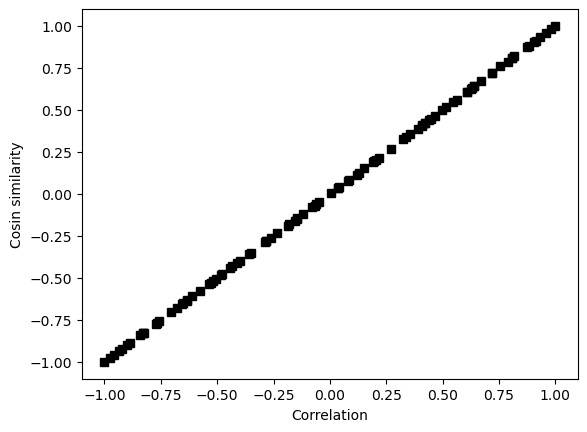

In [67]:
plt.plot(rs, corrs, 's', alpha=0.5)
plt.legend(['Correlation', 'Cosine similarity'])
plt.xlabel('Imposed correlation')
plt.ylabel('Empirical correlation / cosin sim.')

plt.show()

plt.plot(corrs[:, 0], corrs[:, 1], 'ks')
plt.xlabel('Correlation')
plt.ylabel('Cosin similarity')

plt.show()

In [68]:
np.corrcoef(corrs.T)

array([[1.        , 0.99999658],
       [0.99999658, 1.        ]])

In [69]:
stats.pearsonr(corrs[:, 0], corrs[:, 1])

PearsonRResult(statistic=0.999996583278581, pvalue=6.346334756673627e-255)